In [2]:
from pathlib import Path
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [3]:
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

In [4]:
from skimage.util import crop

In [5]:
from skimage.transform import resize

In [6]:
import os

In [7]:
# Import the files from Google Drive
try:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)

  FOLDERNAME = 'Projet_dep'
  %cd /content/gdrive/My\ Drive/$FOLDERNAME
except ImportError:
  pass

Mounted at /content/gdrive
/content/gdrive/My Drive/Projet_dep


(512, 512, 3)


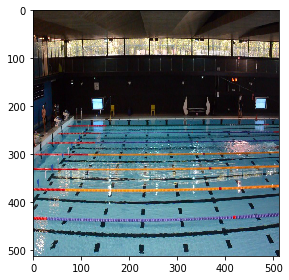

In [8]:
# Print one example of data

k = 1

image_name = "X" + str(k) + ".jpg"
path = "image_db/"
ROOT_IMAGE = Path(path + image_name)

# load the image
image = io.imread(str(ROOT_IMAGE))

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

In [9]:
# Transform array type from float to uint8
def float_to_uint8(img, multiply_channel=False):
  if multiply_channel:
    return (255*np.stack((img,)*3, axis=-1)).astype(np.uint8)
  return (255*img).astype(np.uint8)

In [10]:
# Visualize a heatmap with gaussian blur
def print_heatmap(heatmap):
  display = cv2.GaussianBlur(float_to_uint8(heatmap),(21,21),5.0)
  io.imshow(display)

(8, 512, 512)


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


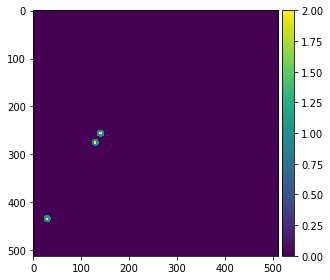

In [12]:
# Print one example of label

k = 1

label_name = "label" + str(k) + ".npy"
path = "label_db/"

# load the label
label = np.load(path + label_name)

# shape of the label
print(label.shape)

# displaying the label
print_heatmap(label[0])

Rotated Image


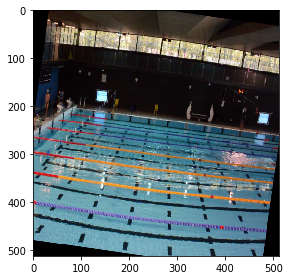

In [13]:
print('Rotated Image')

# Rotating the image by 8 degrees
rotated = rotate(image, angle=-8, )

# Plot the rotated image
io.imshow(rotated)

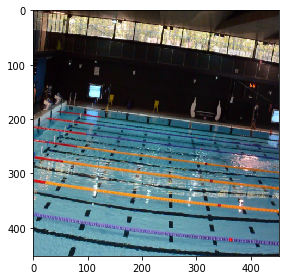

In [14]:
# Cropping to get rid of the black parts
pixels_nb = 30
cropped = crop(rotated, ((pixels_nb, pixels_nb), (pixels_nb, pixels_nb), (0, 0)))
io.imshow(cropped)

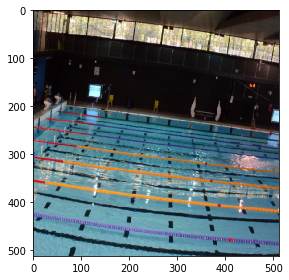

In [15]:
# Resizing to keep a (512,512,3) shape
resized = resize(cropped, (512,512,3))
io.imshow(resized)

In [ ]:
# Usefull for debugging
def spot_non_zero(img):
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i,j]>0:
          print(i,j)

In [16]:
# Save rotated image and label
for k in range(1, 230):
    pixels_nb = 30

    # label part
    label = np.load("label_db/label" + str(k) + ".npy")

    rotated_label = np.array([rotate(label[i], angle=8) for i in range(8)])
    cropped_label = np.array([crop(rotated_label[i], ((pixels_nb, pixels_nb), (pixels_nb, pixels_nb))) for i in range(8)])
    resized_label = np.array([resize(cropped_label[i], (512, 512)) for i in range(8)])
    resized_label[resized_label>0] = 1.

    # np.save("label_db/label" + str(k) + "_rotated.npy", resized_label)




    # image part
    image_name = "X" + str(k) + ".jpg"
    path = "image_db/"
    ROOT_IMAGE = Path(path + image_name)

    image = io.imread(str(ROOT_IMAGE))

    rotated = rotate(image, angle=8)
    cropped = crop(rotated, ((pixels_nb, pixels_nb), (pixels_nb, pixels_nb), (0, 0)))
    resized = resize(cropped, (512,512,3))
    resized_2 = (255*resized).astype(np.uint8)

    # io.imsave(path + "X" + str(k) + "_rotated.jpg", resized_2, quality=100)

In [17]:
# Save shifted image and label
for k in range(1, 230):
    # shifting at random
    pixels_nb = np.random.randint(1,150)

    # label part
    label = np.load("label_db/label" + str(k) + ".npy")

    cropped_label = np.array([crop(label[i], ((pixels_nb, 0), (0, 0))) for i in range(8)])
    resized_label = np.array([resize(cropped_label[i], (512, 512)) for i in range(8)])
    resized_label[resized_label>0] = 1.
    # np.save("label_db/label" + str(k) + "_shifted.npy", resized_label)



    # image part
    image_name = "X" + str(k) + ".jpg"
    path = "image_db/"
    ROOT_IMAGE = Path(path + image_name)
    
    image = io.imread(str(ROOT_IMAGE))
  
    cropped = crop(image, ((pixels_nb, 0), (0, 0), (0, 0)))
    resized = resize(cropped, (512,512,3))
    resized_2 = (255*resized).astype(np.uint8)

    # io.imsave(path + "X" + str(k) + "_shifted.jpg", resized_2, quality=100)

In [18]:
# Flip left to right
for k in range(1, 230):
  
  # label part
  label = np.load("label_db/label" + str(k) + ".npy")

  flipped_label = np.flip(label, axis=2)

  # np.save("label_db/label" + str(k) + "_flipped.npy", flipped_label)




  # image part
  image_name = "X" + str(k) + ".jpg"
  path = "image_db/"
  ROOT_IMAGE = Path(path + image_name)

  image = io.imread(str(ROOT_IMAGE))

  flipped = np.flip(image, axis=1)

  # io.imsave(path + "X" + str(k) + "_flipped.jpg", flipped, quality=100)

In [19]:
# Random noise
for k in range(1, 230):
  sigma = 0.05
  
  # label part
  label = np.load("label_db/label" + str(k) + ".npy")
  
  # np.save("label_db/label" + str(k) + "_noisy.npy", label)



  # image part
  image_name = "X" + str(k) + ".jpg"
  path = "image_db/"
  ROOT_IMAGE = Path(path + image_name)

  image = io.imread(str(ROOT_IMAGE))

  noisy = random_noise(image, var=sigma**2)
  noisy = float_to_uint8(noisy)

  # io.imsave(path + "X" + str(k) + "_noisy.jpg", noisy, quality=100)